In [1]:
!pip install seaborn
!pip install pandas

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing


In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)

Found 17572 files belonging to 38 classes.


In [5]:
#for x,y in training_set:
 #   print(x,x.shape)
  #  print(y,y.shape)
   # break

To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to 
   capture relevant feature or model is confusing due to lack of feature so feed with more feature

# Building Model

In [6]:
cnn = tf.keras.models.Sequential()

### Building Convolution layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [16]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling Model And Training Phase



In [17]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [19]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)


Epoch 1/10
2197/2197 [==============================] - 2516s 1s/step - loss: 1.2943 - accuracy: 0.6170 - val_loss: 0.4831 - val_accuracy: 0.8486
Epoch 2/10
2197/2197 [==============================] - 2557s 1s/step - loss: 0.4373 - accuracy: 0.8606 - val_loss: 0.2829 - val_accuracy: 0.9083
Epoch 3/10
2197/2197 [==============================] - 2946s 1s/step - loss: 0.2654 - accuracy: 0.9144 - val_loss: 0.1854 - val_accuracy: 0.9393
Epoch 4/10
2197/2197 [==============================] - 2589s 1s/step - loss: 0.1805 - accuracy: 0.9410 - val_loss: 0.1977 - val_accuracy: 0.9350
Epoch 5/10
2197/2197 [==============================] - 2314s 1s/step - loss: 0.1355 - accuracy: 0.9553 - val_loss: 0.1602 - val_accuracy: 0.9483
Epoch 6/10
2197/2197 [==============================] - 2206s 1s/step - loss: 0.1069 - accuracy: 0.9642 - val_loss: 0.1572 - val_accuracy: 0.9532
Epoch 7/10
2197/2197 [==============================] - 2170s 988ms/step - loss: 0.0848 - accuracy: 0.9726 - val_loss: 0.155

# Evaluating Model

In [20]:
#Training set Accuracy  , Evaluating the performance model on other matrix
train_loss,train_acc=cnn.evaluate(training_set)            #returns both the values
print('Training accuracy: ',train_acc)

2197/2197 [==============================] - 498s 226ms/step - loss: 0.0285 - accuracy: 0.9909
Training accuracy:  0.99090975522995


In [21]:
#Validation set Accuracy
val_loss,val_acc = cnn.evaluate(validation_set)
print('Validation accuracy: ',val_acc)

550/550 [==============================] - 118s 214ms/step - loss: 0.1151 - accuracy: 0.9656
Validation accuracy:  0.9655702114105225


## Saving Model

In [22]:
#saves the model,no need to run again
cnn.save('trained_model.h5')
    #can save the file with the extension of h5 but it 
                                                 #it takes more space

In [23]:
training_history.history #Returns Dictionary of history with 4 keys given below

{'loss': [1.2943066358566284,
  0.4373389780521393,
  0.2654241919517517,
  0.18054057657718658,
  0.13550999760627747,
  0.10688208043575287,
  0.08479543775320053,
  0.07215062528848648,
  0.06270919740200043,
  0.05572370067238808],
 'accuracy': [0.6170282363891602,
  0.8605875372886658,
  0.9144178032875061,
  0.9409915208816528,
  0.9553310871124268,
  0.9642364382743835,
  0.9726011753082275,
  0.9766697287559509,
  0.9796571731567383,
  0.9824027419090271],
 'val_loss': [0.48310500383377075,
  0.2828785181045532,
  0.18539799749851227,
  0.19770319759845734,
  0.16024579107761383,
  0.15715813636779785,
  0.15582846105098724,
  0.1893732249736786,
  0.16628041863441467,
  0.1151135116815567],
 'val_accuracy': [0.8485658764839172,
  0.9083200693130493,
  0.9392784237861633,
  0.9350102543830872,
  0.9482699632644653,
  0.9531641006469727,
  0.9520828723907471,
  0.943375825881958,
  0.9550421237945557,
  0.9655702114105225]}

In [24]:
#Recording History in JSON
import json
with open('training_hist.json','w') as f:    #w is used for write operation
  json.dump(training_history.history,f)      #dump is used to store the value of training_history.history
                                             #in f

In [25]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Accuracy Visualization


In [1]:
epochs = [i for i in range(1,11)]   #1 to 10
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy') #epochs is x ais
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [29]:
#entire 38 class,we need class name to precision recall and confusion matrix

class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [30]:
#using validation set for testset

test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [31]:
#performs prediction
y_pred = cnn.predict(test_set)
#y_pred,y_pred.shape                                 #gives the shape of matrix 17572*38 , for each image 38 probability
predicted_categories = tf.argmax(y_pred, axis=1)    #argmax returns maximum value in the proobablility
                                                    #returns index in column wise if axis=0 rowwise

17572/17572 [==============================] - 426s 24ms/step


In [32]:

#interested in label ie labels and want rowwiseThe provided code snippet prepares the true categories (labels)
#for the images in the test dataset (test_set) 
#to compare them with the predicted categories

true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [33]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [34]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [36]:
!pip install scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 3.3 MB/s eta 0:00:04
   - -------------------------------------- 0.4/10.6 MB 4.6 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/10.6 MB 6.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/10.6 MB 7.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/10.6 MB 7.4 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/10.6 MB 7.4 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/10.6 MB 6.1 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/10.6 MB 6.1 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/10.6 MB 6.1 MB/s eta 0:00:02
   ----------- ---------------------------- 3.2/10.6 MB 6.7 MB/s eta 0:00:02
   ------------- -------------------------- 3.5/10.6 MB 6.7 MB/s eta 0:00:02
   ------------- -------------------------- 3.5/10.6 MB 6.4 MB/s eta 0:00:02
   ---

In [39]:
import sklearn
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

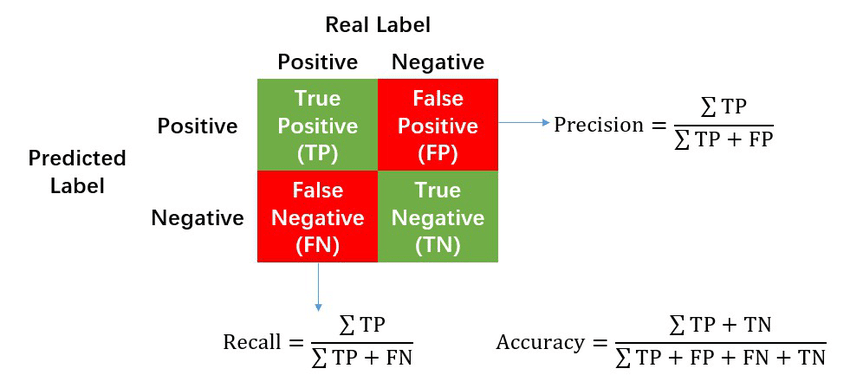

In [40]:
#fi score is harmonic mean of precesion and recall

# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.98      0.98       504
                                 Apple___Black_rot       1.00      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.97      0.98      0.98       440
                                   Apple___healthy       0.97      0.98      0.97       502
                               Blueberry___healthy       0.98      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.96      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.94      0.

# Confusion Matrix Visualization


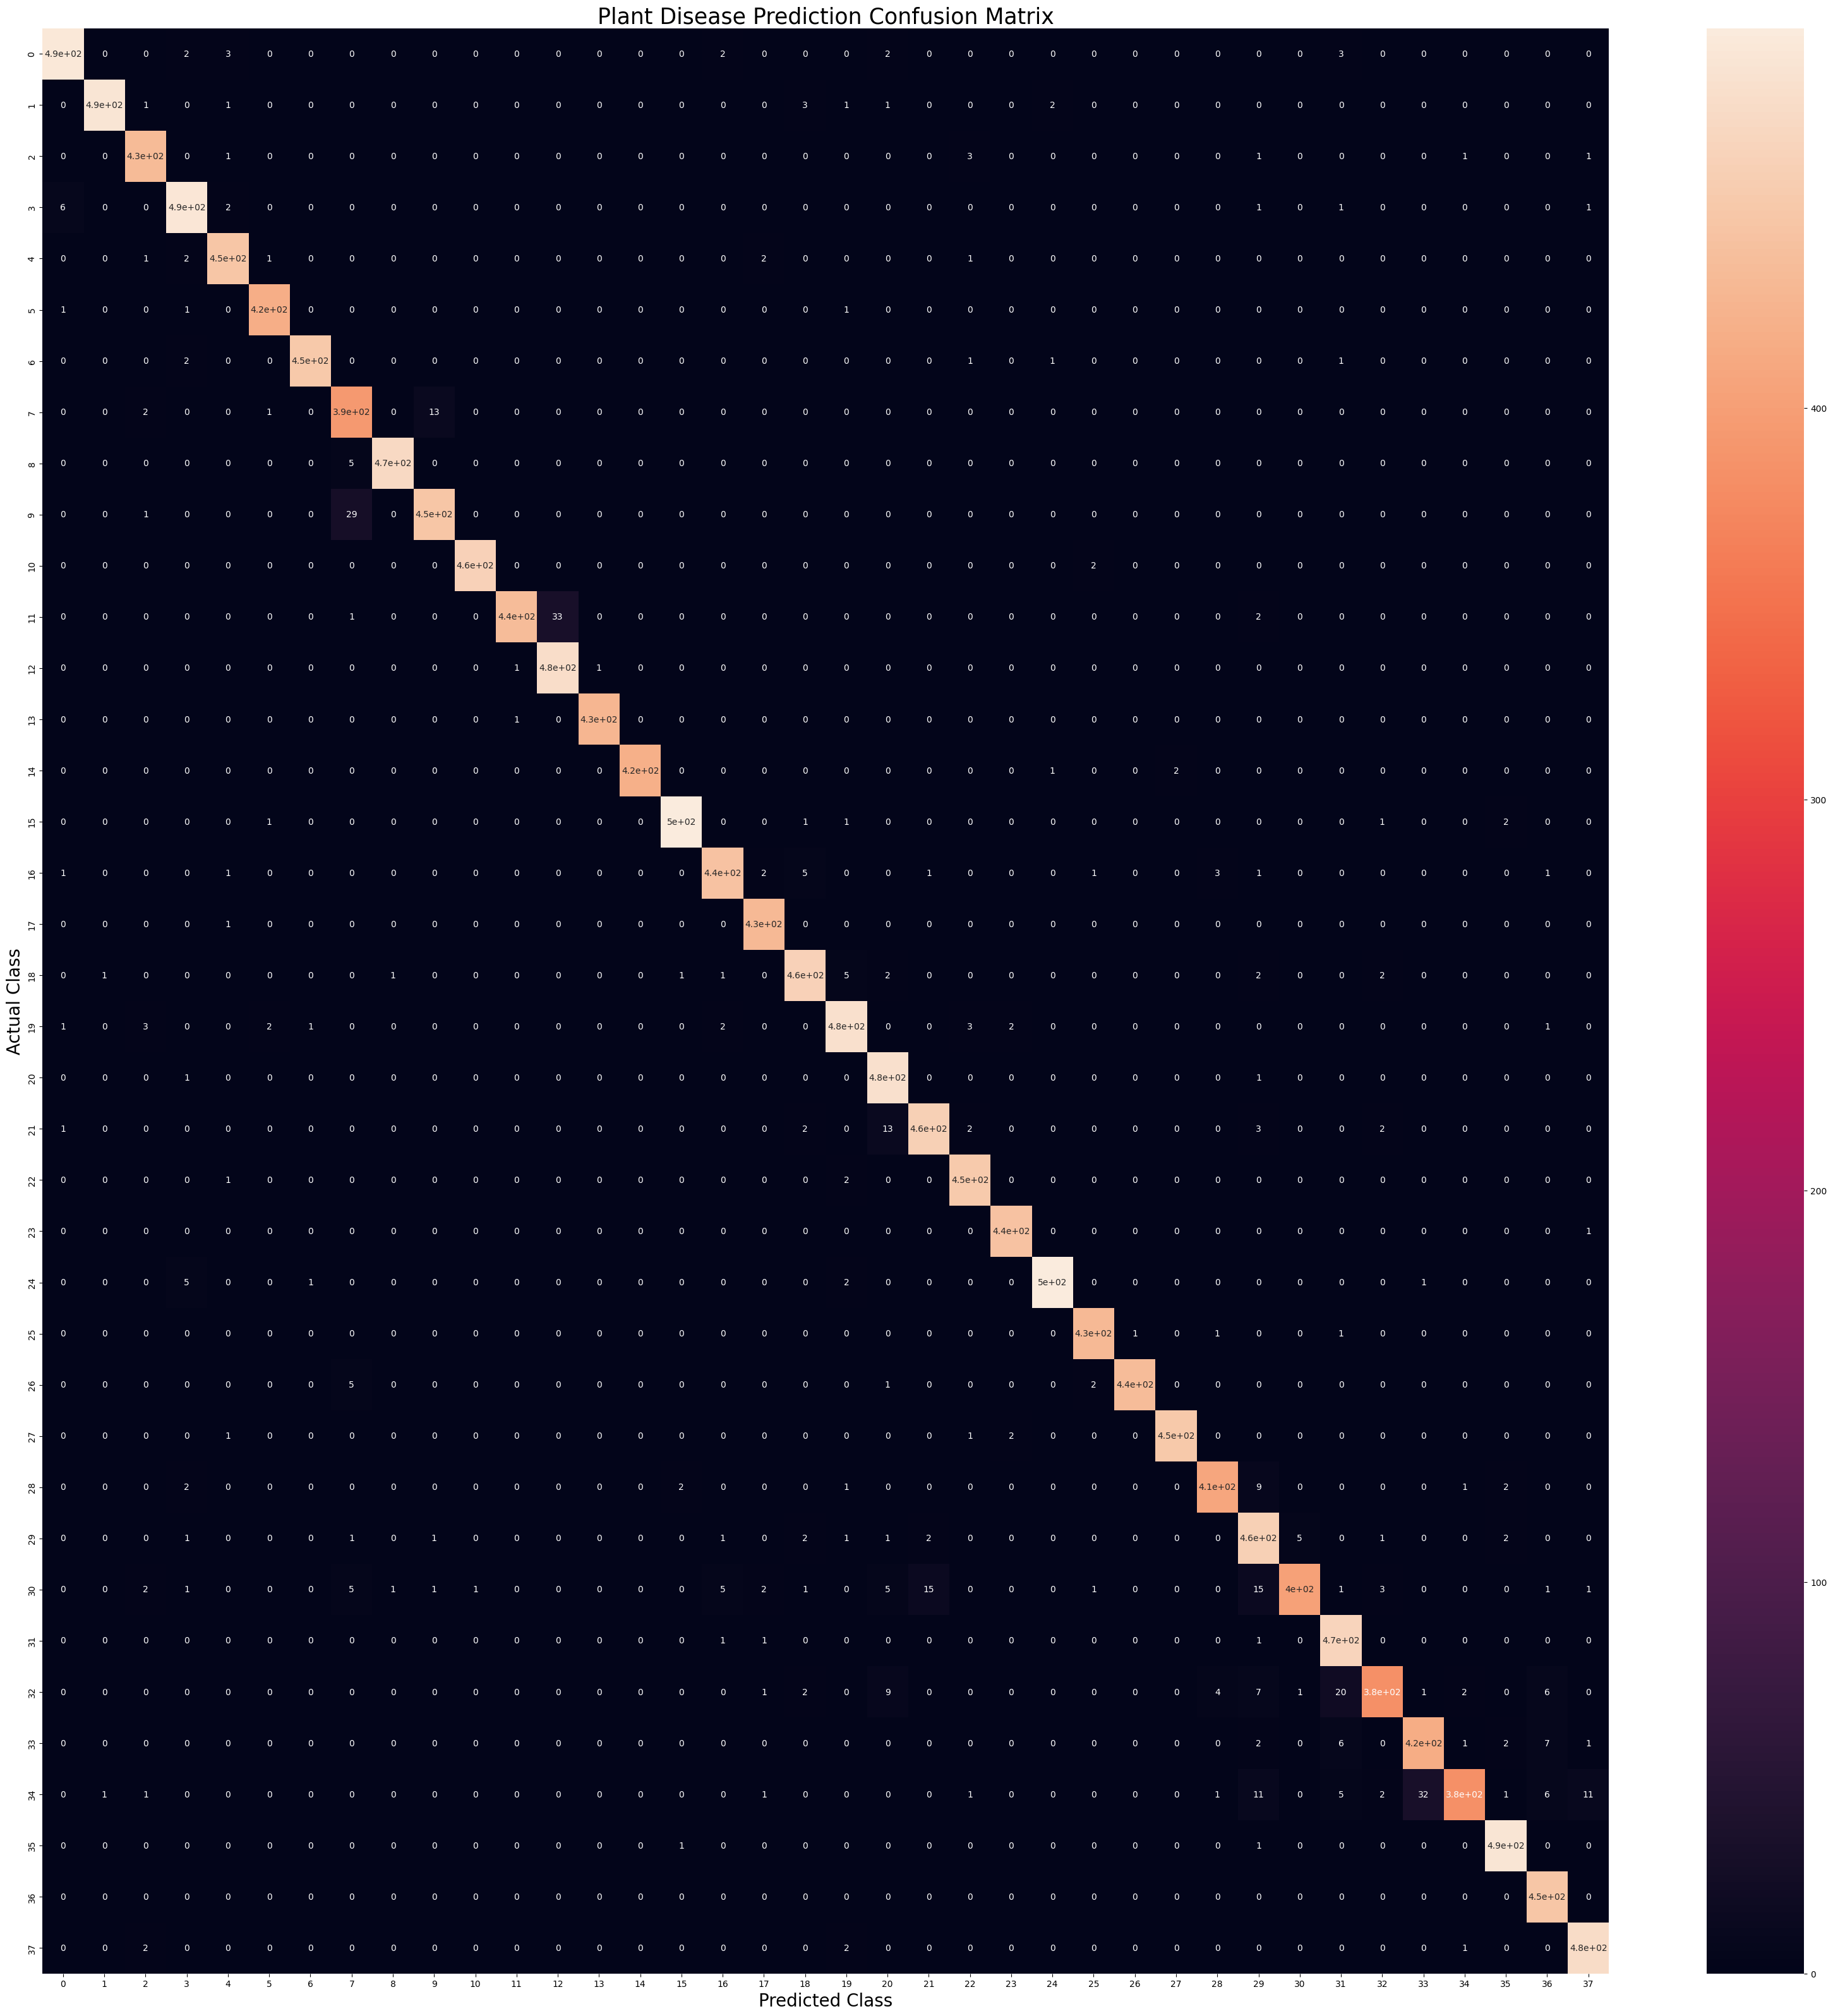

In [41]:

#uses seaborn libraries
#uses heatmap,annot
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()